In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

##### Decision Boundary Function (one small modification)

In [1]:
## a function for plotting the decision boundary
# Set min and max values and give it some padding
def decision_boundary(X,y,clf,ax):
    x_min, x_max = X[:, 0].min(), X[:, 0].max() 
    y_min, y_max = X[:, 1].min(), X[:, 1].max() 
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100).reshape(-1,1), np.linspace(y_min, y_max, 100).reshape(-1,1))
    # Predict the function value for the whole gid
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = clf.predict(X_new) # Translates slice objects to concatenation along the second axis
    print(y_pred.shape)
    zz = y_pred.reshape(xx.shape)
    print(zz.shape)
    # Plot the contour and training examples
    #fig, ax = plt.subplots()
    from matplotlib.colors import ListedColormap
    cm2 = ListedColormap(['#0000aa', '#ff2020','#386cb0'])
    ax.contourf(xx, yy, zz,alpha=.4, cmap=cm2) 
    ax.scatter(X[:, 0], X[:, 1], c =y)
    ax.set_xlabel('feature1')
    ax.set_ylabel('feature2')
    return ax

#### Implementing Decision Tree Classifier on Iris Dataset

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

X_train, X_test , y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.20,random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [5]:
X_train.shape

(120, 2)

In [6]:
print("Accuracy on training set: {:.3f}".format(tree_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_clf.score(X_test, y_test)))

Accuracy on training set: 0.950
Accuracy on test set: 0.967


##### Tree Structure

In [8]:
from sklearn import tree
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_0 <= 2.45
|   |--- class: 0
|--- feature_0 >  2.45
|   |--- feature_0 <= 4.75
|   |   |--- class: 1
|   |--- feature_0 >  4.75
|   |   |--- class: 2



In [9]:
tree_clf.classes_

array([0, 1, 2])

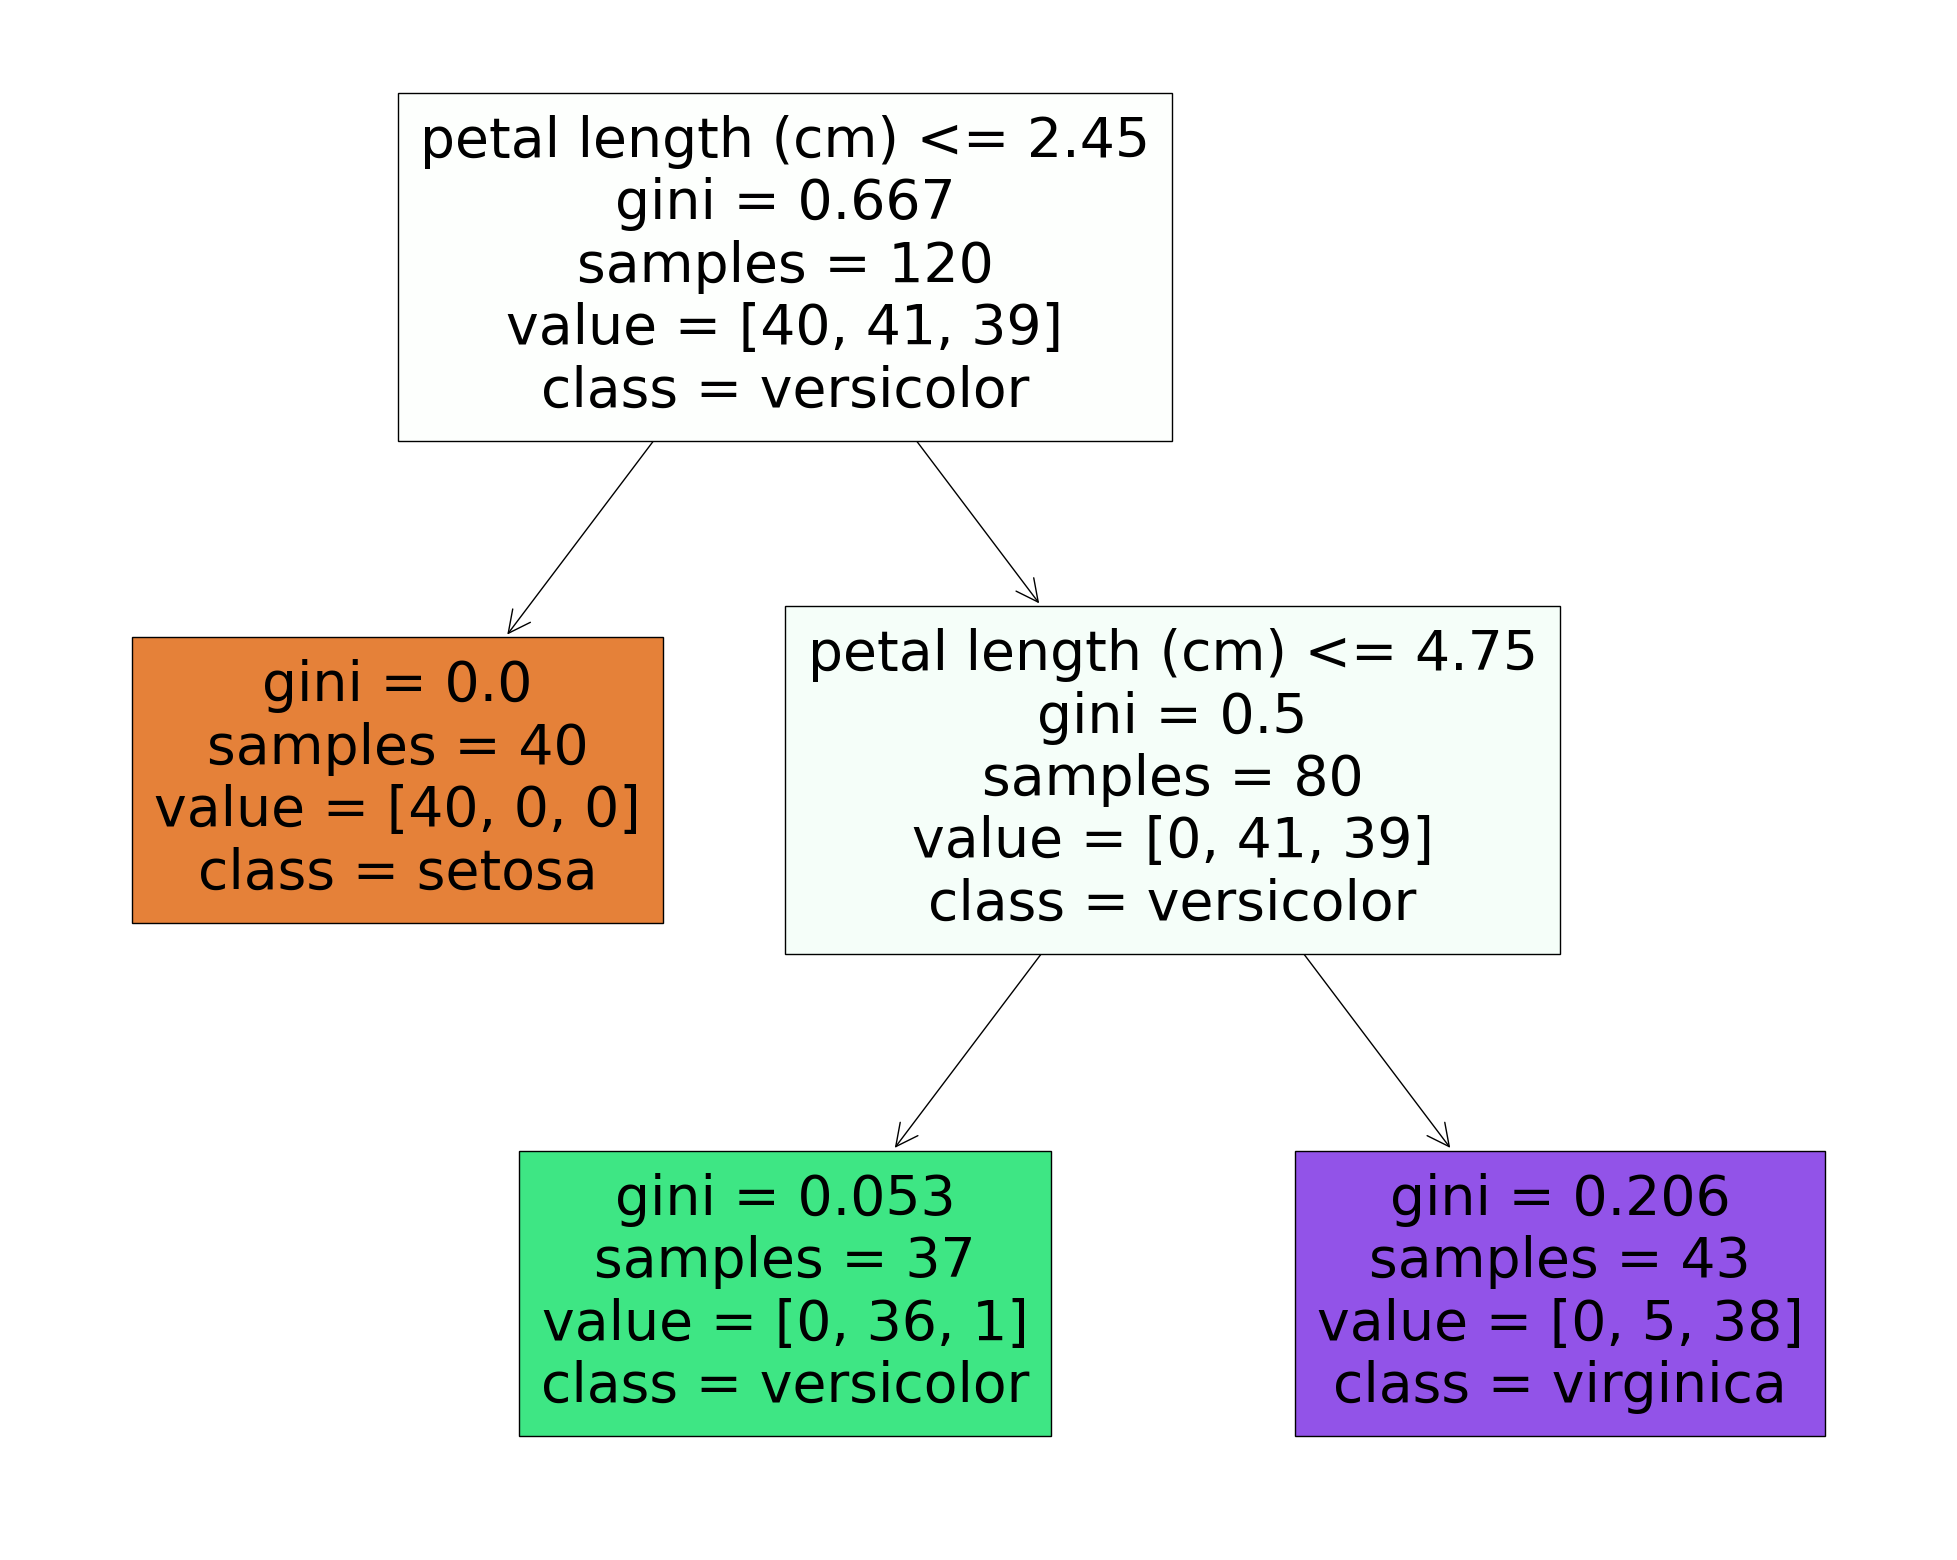

In [10]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=["petal length (cm)", "petal width (cm)"],  
                   class_names=iris.target_names,
                   filled=True)

##### Visualizing the Decision Boundary 

(10000,)
(100, 100)


<Axes: xlabel='feature1', ylabel='feature2'>

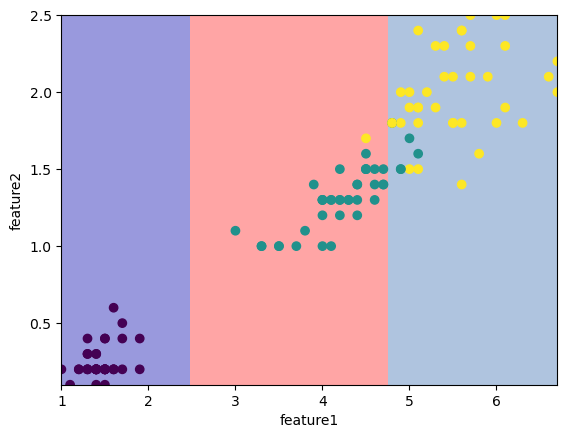

In [11]:
ax = plt.gca()
decision_boundary(X_train,y_train,tree_clf,ax)

## Estimating Class Probabilies

A decision tree can also estimate the probability that an instance belongs to a particular class k. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. 

In [12]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.116, 0.884]])

In [13]:
tree_clf.predict([[5, 1.5]])

array([2])

##### Decision Tree using the make moons dataset

Text(0, 0.5, 'feature2')

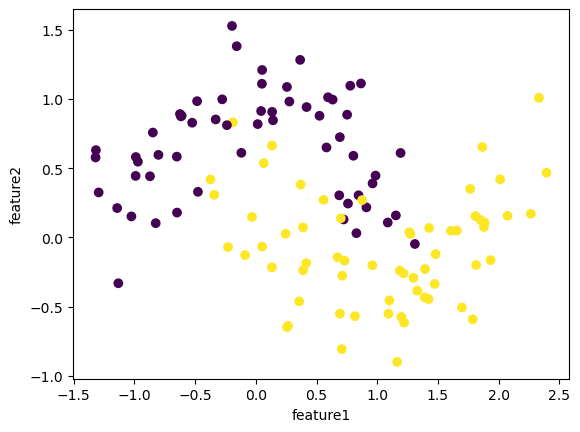

In [14]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=150, noise = 0.25, random_state=42)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
plt.scatter(X_train[:,0],X_train[:,1], marker = 'o', c= y_train)
plt.xlabel('feature1')
plt.ylabel('feature2')

In [15]:
from sklearn.datasets import make_moons
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_train, y_train)
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

##### Visualizing the decision boundary without regularization

(10000,)
(100, 100)


<Axes: xlabel='feature1', ylabel='feature2'>

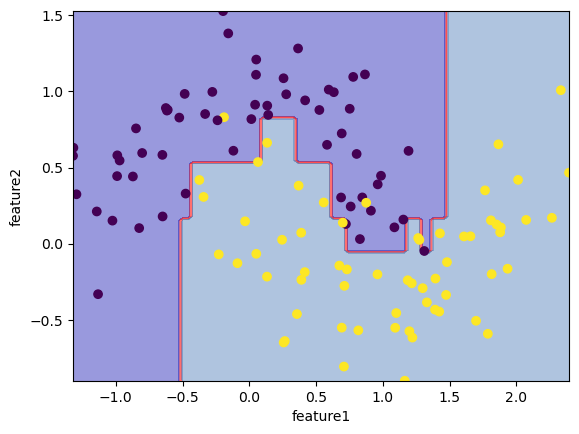

In [16]:
ax = plt.gca()
decision_boundary(X_train,y_train,tree_clf1,ax)

##### Visualizing the decision boundary with regularization

(10000,)
(100, 100)


<Axes: xlabel='feature1', ylabel='feature2'>

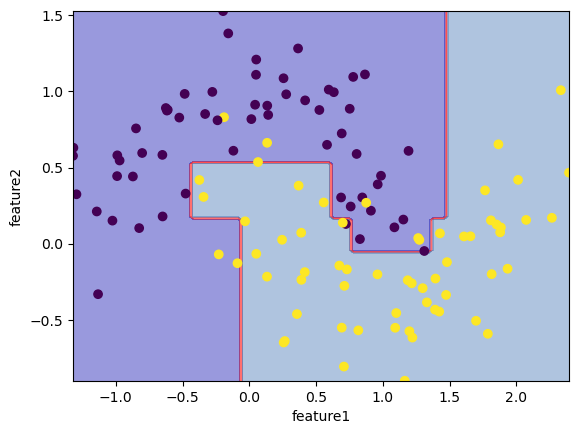

In [17]:
ax = plt.gca()
decision_boundary(X_train,y_train,tree_clf2,ax)

In [18]:
#without regularization 
print("Accuracy on training set: {:.3f}".format(tree_clf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_clf1.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.800


In [19]:
#with regularization 
print("Accuracy on training set: {:.3f}".format(tree_clf2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_clf2.score(X_test, y_test)))

Accuracy on training set: 0.933
Accuracy on test set: 0.833


### Decision Tree Regression

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [21]:
text_representation = tree.export_text(tree_reg)
print(text_representation)

|--- feature_0 <= -0.30
|   |--- feature_0 <= -0.41
|   |   |--- value: [0.21]
|   |--- feature_0 >  -0.41
|   |   |--- value: [0.14]
|--- feature_0 >  -0.30
|   |--- feature_0 <= 0.27
|   |   |--- value: [0.03]
|   |--- feature_0 >  0.27
|   |   |--- value: [0.15]



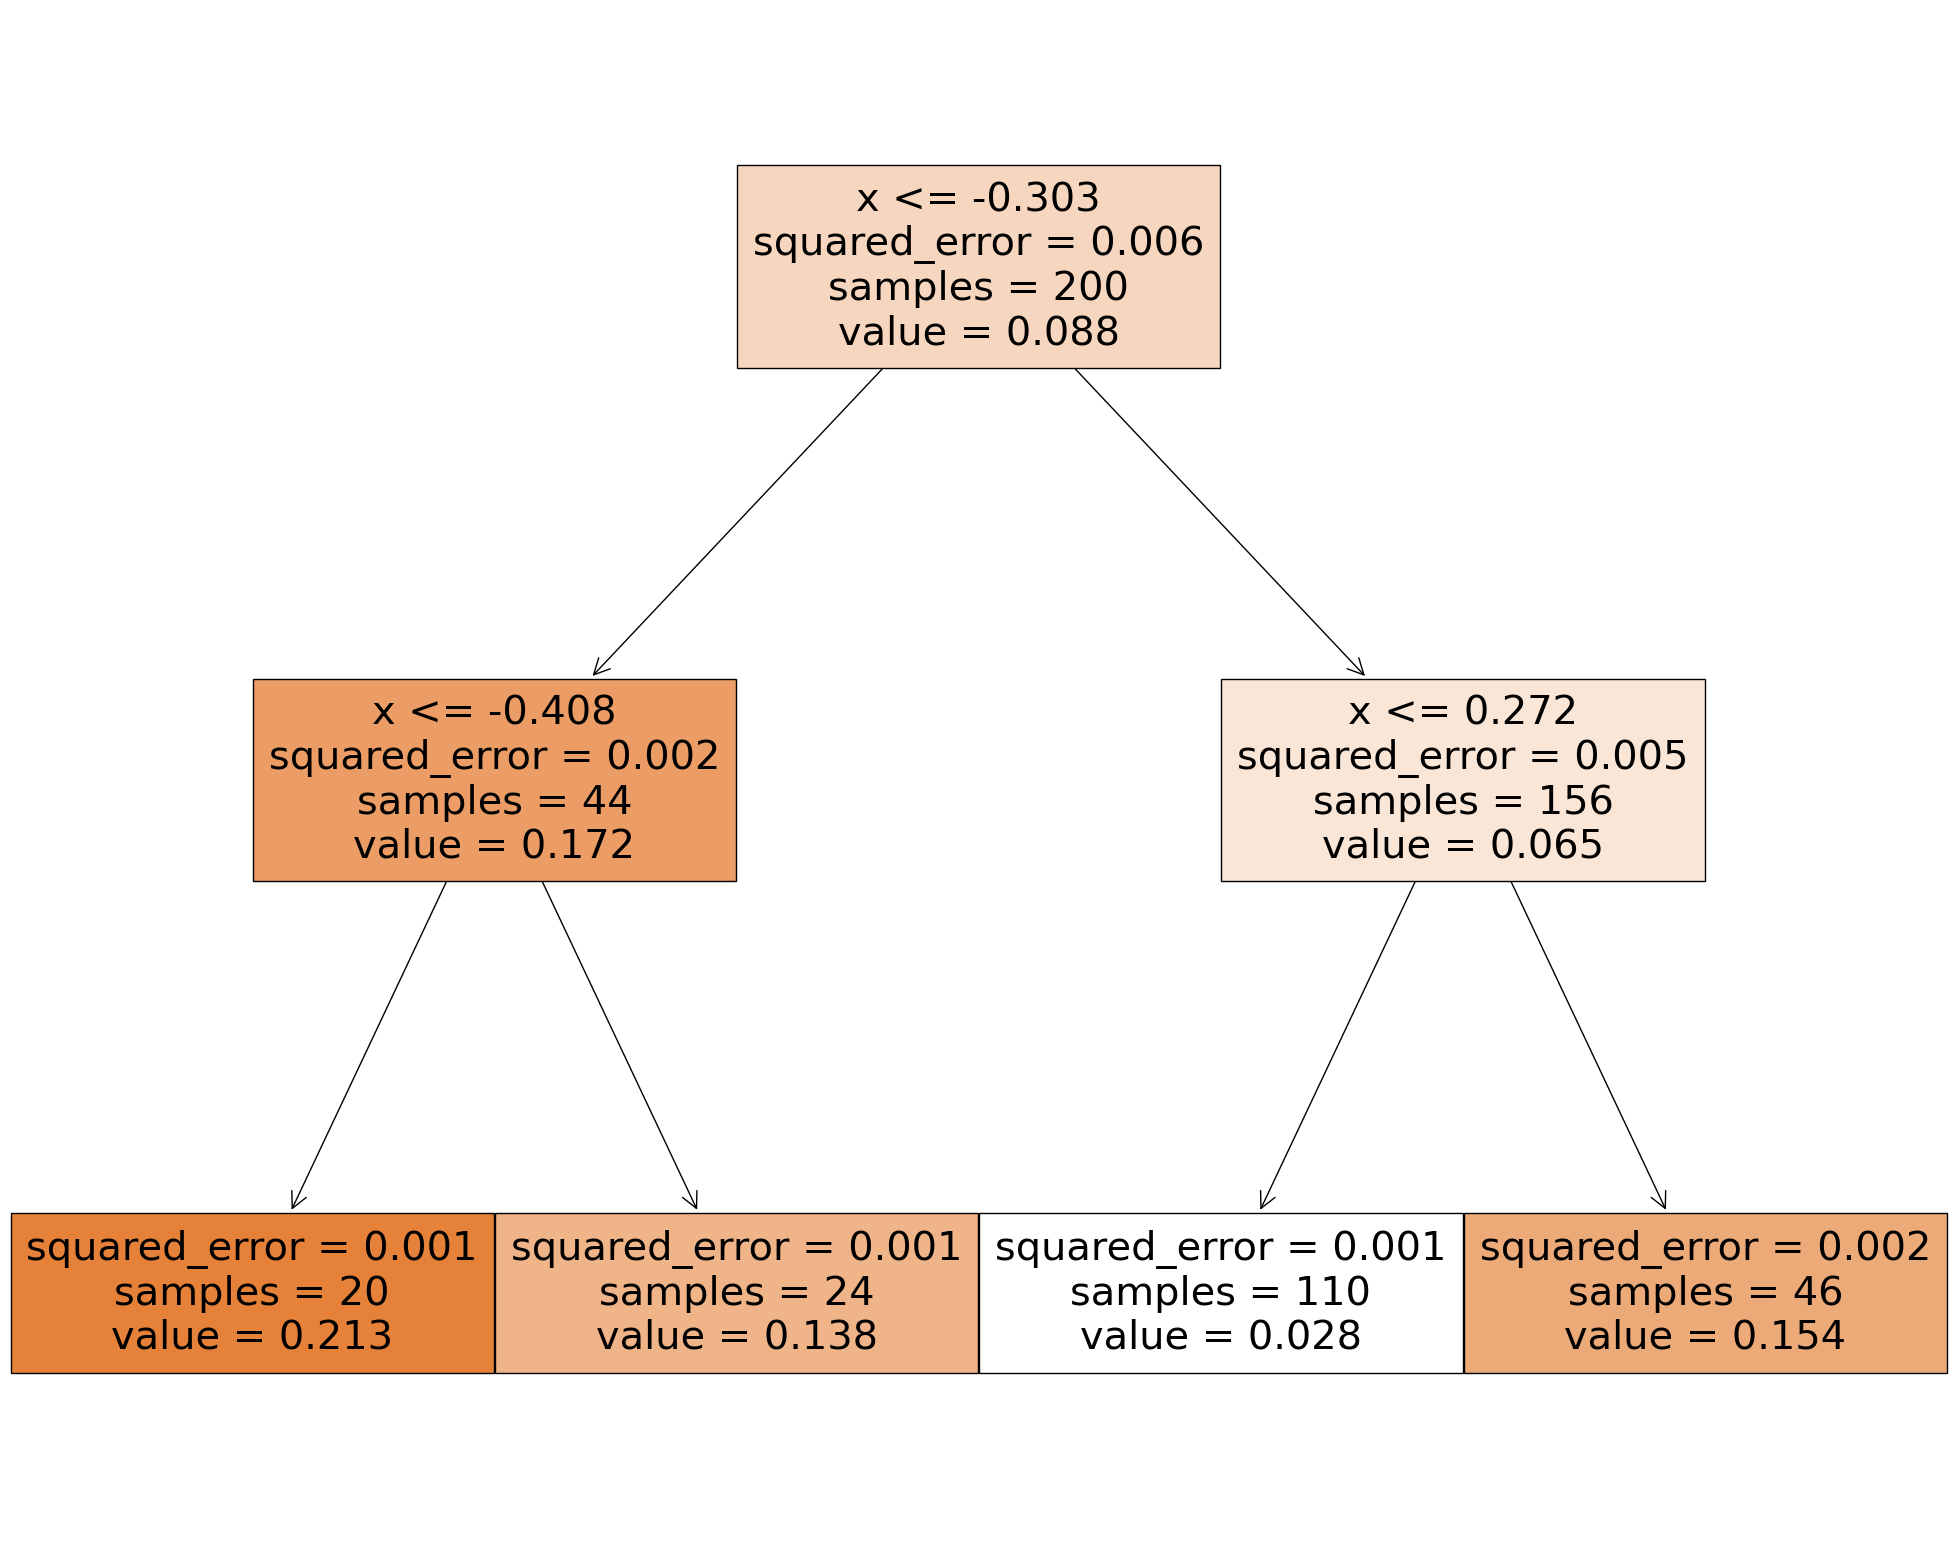

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg, feature_names='x', filled=True)